# Feature Matching

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def_path = 'DATA/'

def load_image(img_name = "00-puppy.jpg"):
    img = cv2.imread(def_path + img_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def load_img_txt(text = "Udemy"):
    img = np.zeros((600, 600))
    font_face = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img, text = text, org = (10, 300), fontFace = font_face, fontScale = 5, color = (255, 255, 255), thickness = 15)
    return img

def disp(img, type = 'gray'):
    fig = plt.figure(figsize = (15, 15))
    ax = fig.add_subplot(111)
    if(type == "gray"):
        ax.imshow(img, cmap = 'gray')
    else:
        ax.imshow(img)

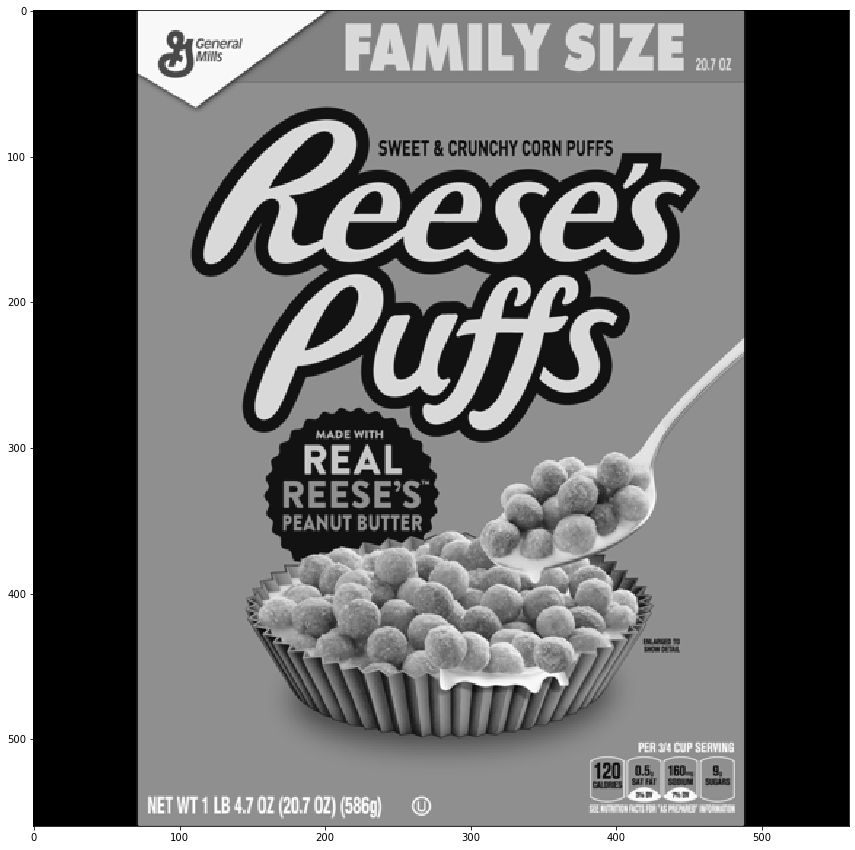

In [3]:
cereal = cv2.imread('../DATA/reeses_puffs.png', 0)
disp(cereal)

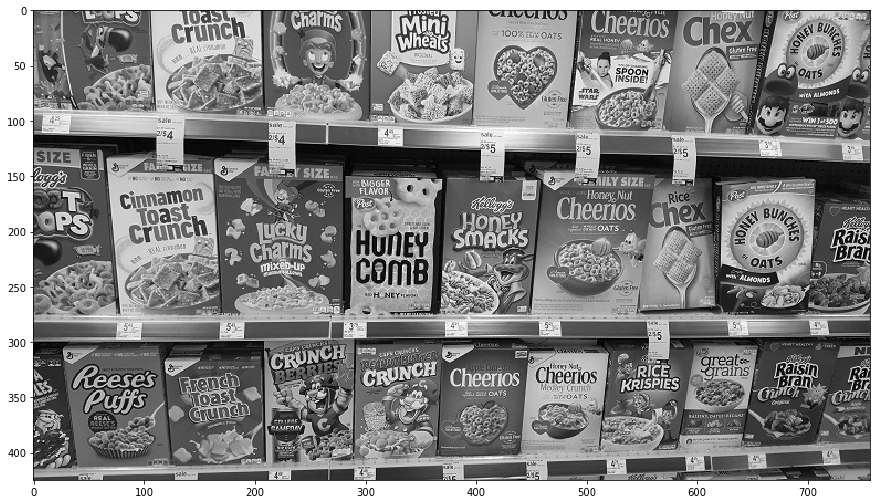

In [4]:
cereals_many = cv2.imread('../DATA/many_cereals.jpg', 0)
disp(cereals_many)

## 1. Brute Force with ORB detectors

#### <b>Disadvantages</b>:
#### 1. The cereal box on the rack image is distorted
#### 2. The template must almost exactly match the test image (Eg:/
#### The label family size if available in the template must also be available in the test image)
#### 3. A lot of other objects look like the target image

Number of matches: 139


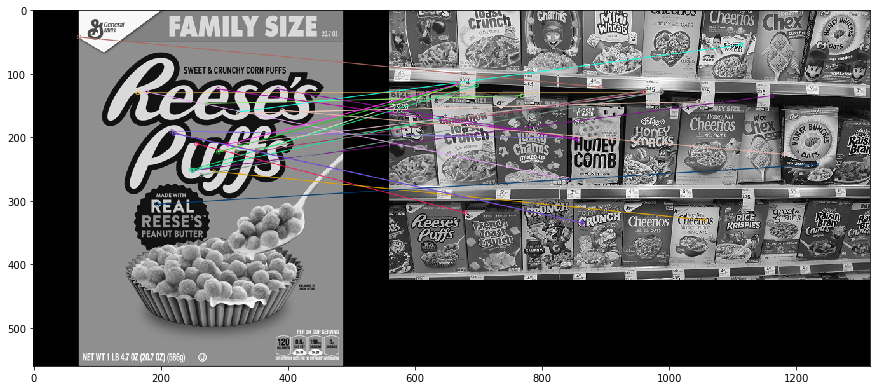

In [5]:
# Notice that the Reeses puffs template has a family size which is not there on the rack
orb = cv2.ORB_create()
kpt1, desc1 = orb.detectAndCompute(cereal, None)
kpt2, desc2 = orb.detectAndCompute(cereals_many, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

# These create objects as output that have distances as attributes.
# Distance is inversely proportional to the match accuracy
matches = bf.match(desc1, desc2)

# Sort the matches by their distances
matches = sorted(matches, key = lambda x:x.distance)

#Display the number of matches
print("Number of matches: " + str(len(matches)))

# Draw the matches on final image
cereal_mat = cv2.drawMatches(cereal, kpt1, cereals_many, kpt2, matches[:25], None, flags = 2)

disp(cereal_mat)

## 2. Brute Force with SIFT descriptor

In [7]:
# Create the SIFT object
sift = cv2.xfeatures2d.SIFT_create()

# Detect and compute the features and their correspoding relative distances
kp1, des1 = sift.detectAndCompute(cereal, None)
kp2, des2 = sift.detectAndCompute(cereals_many, None)

# Compare the features of the template and the test images
bf = cv2.BFMatcher()

# Display the descriptor for intuition
print(des1)

# Get the 'k' number of best matches from each descriptor
matches = bf.knnMatch(des1, des2, k =2)

# GEt intuition on matches; They are already sorted
print(matches)

error: OpenCV(4.2.0) C:\projects\opencv-python\opencv_contrib\modules\xfeatures2d\src\sift.cpp:1210: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'cv::xfeatures2d::SIFT::create'


In [8]:
# Get the matches that are to be drawn
good = []

# Less distance means a better match (inversely proportional)
# Ratio test performed with 2 matches
for match1, match2 in matches:
    # If match1 distance < 55% of match2 distance
    # Then descriptor for that match is a good match
    if(match1.distance < 0.75*match2.distance):
        good.append([match1])

TypeError: cannot unpack non-iterable cv2.DMatch object

In [9]:
print(len(good))
print(len(matches))

# Draw the matched features for intuition
sift_matches = cv2.drawMatchesKnn(cereal, kp1, cereals_many, kp2, good, None, flags=2)

0
139


NameError: name 'kp1' is not defined

## 3. FLAN based matches